# Human Centered Data Science
## Part 1 - Common Analysis

---------------------------------------------------

In [173]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading Raw data for US confirmed Covid cases

In [174]:
raw_data = pd.read_csv(r"RAW_us_confirmed_cases.csv")
raw_data.head()

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/2

In [175]:
#subset data for Davidson County in Tennessee State
data_d = raw_data[(raw_data['Admin2']=='Davidson') & (raw_data['Province_State']=='Tennessee')]
data_d

#FIPS = 47037.0

,Province_State,Admin2,UID,iso2,iso3,code3,FIPS,Country_Region,Lat,Long_,Combined_Key,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20,5/28/20,5/29/20,5/30/20,5/31/20,6/1/20,6/2/20,6/3/20,6/4/20,6/5/20,6/6/20,6/7/20,6/8/20,6/9/20,6/10/20,6/11/20,6/12/20,6/13/20,6/14/20,6/15/20,6/16/20,6/17/20,6/18/20,6/19/20,6/20/20,6/21/20,6/22/20,6/23/20,6/24/20,6/25/20,6/26/20,6/27/20,6/28/20,6/29/20,6/30/20,7/1/20,7/2/20,7/3/20,7/4/20,7/5/20,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20,7/16/20,7/17/20,7/18/20,7/19/20,7/20/20,7/21/20,7/22/20,7/23/20,7/24/20,7/25/20,7/26/20,7/27/20,7/28/20,7/29/20,7/30/20,7/31/20,8/1/20,8/2/20,8/3/20,8/4/20,8/5/20,8/6/20,8/7/20,8/8/20,8/9/20,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,8/30/20,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20,9/29/20,9/30/20,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20,10/11/20,10/12/20,10/13/20,10/14/20,10/15/20,10/16/20,10/17/20,10/18/20,10/19/20,10/20/20,10/21/20,10/22/20,10/23/20,10/24/20,10/25/20,10/26/20,10/27/20,10/28/20,10/29/20,10/30/20,10/31/20,11/1/20,11/2/20,11/3/20,11/4/20,11/5/20,11/6/20,11/7/20,11/8/20,11/9/20,11/10/20,11/11/20,11/12/20,11/13/20,11/14/20,11/15/20,11/16/20,11/17/20,11/18/20,11/19/20,11/20/20,11/21/20,11/22/20,11/23/20,11/24/20,11/25/20,11/26/20,11/27/20,11/28/20,11/29/20,11/30/20,12/1/20,12/2/20,12/3/20,12/4/20,12/5/20,12/6/20,12/7/20,12/8/20,12/9/20,12/10/20,12/11/20,12/12/20,12/13/20,12/14/20,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,12/25/20,12/26/20,12/27/20,12/28/20,12/29/20,12/30/20,12/31/20,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21,1/11/21,1/12/21,1/13/21,1/14/21,1/15/21,1/16/21,1/17/21,1/18/21,1/19/21,1/20/21,1/21/21,1/22/21,1/23/21,1/24/21,1/25/21,1/26/21,1/27/21,1/28/21,1/29/21,1/30/21,1/31/21,2/1/21,2/2/21,2/3/21,2/4/21,2/5/21,2/6/21,2/7/21,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21,3/26/21,3/27/21,3/28/21,3/29/21,3/30/21,3/31/21,4/1/21,4/2/21,4/3/21,4/4/21,4/5/21,4/6/21,4/7/21,4/8/21,4/9/21,4/10/21,4/11/21,4/12/21,4/13/21,4/14/21,4/15/21,4/16/21,4/17/21,4/18/21,4/19/21,4/20/21,4/21/21,4/22/21,4/23/21,4/24/21,4/25/21,4/26/21,4/27/21,4/28/21,4/29/21,4/30/21,5/1/21,5/2/21,5/3/21,5/4/21,5/5/21,5/6/21,5/7/21,5/8/21,5/9/21,5/10/21,5/11/21,5/12/21,5/13/21,5/14/21,5/15/21,5/16/21,5/17/21,5/18/21,5/19/21,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21,5/30/21,5/31/2

In [176]:
data_d.columns

Index(['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',
       'Country_Region', 'Lat', 'Long_',
       ...
       '10/23/22', '10/24/22', '10/25/22', '10/26/22', '10/27/22', '10/28/22',
       '10/29/22', '10/30/22', '10/31/22', '11/1/22'],
      dtype='object', length=1026)

In [177]:
data_d.drop(columns = ['Province_State', 'Admin2', 'UID', 'iso2', 'iso3', 'code3', 'FIPS',\
                       'Country_Region', 'Lat', 'Long_','Combined_Key'], inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [178]:
davidson_series = data_d.squeeze()
davidson_series.head()

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
1/26/20    0
Name: 2621, dtype: int64

<AxesSubplot:>

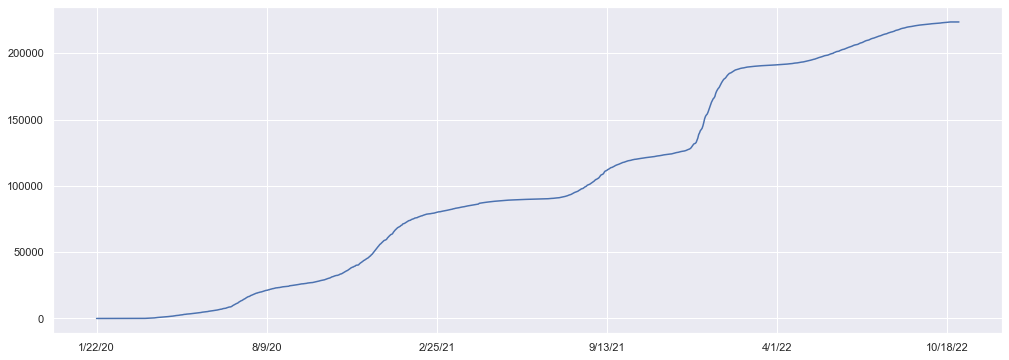

In [179]:
davidson_series.plot()

## Checking if time series is continuous

In [180]:
davidson_series.index = pd.to_datetime(davidson_series.index)
davidson_series1 = davidson_series.asfreq('d')
check = pd.Series(davidson_series1[davidson_series1.isnull()].index)
check

Series([], dtype: datetime64[ns])

### No gaps observed. Series is continuous.

In [181]:
davidson_df = pd.DataFrame(davidson_series).reset_index()
davidson_df.columns = ["date", "cases"]
davidson_df["date"] = pd.to_datetime(davidson_df["date"])
davidson_df.head()

,date,cases
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


## Loading mask usage by county data by NY Times

In [182]:
mask_use_by_county = pd.read_csv(r"mask-use-by-county.csv")

#subset data for Davidson County in Tennessee State
mask_use_by_county = mask_use_by_county[mask_use_by_county['COUNTYFP']==47037]
mask_use_by_county

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
2446,47037,0.02,0.037,0.086,0.181,0.677


In [183]:
mask_use_by_county.columns

Index(['COUNTYFP', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS'], dtype='object')

### Let's talk about bias in surveys:
### 67.7% of people's response was Always when asked “How often do you wear a mask in public when you expect to be within six feet of another person?”. This is generally a positive response since more than 50% people asked did reply a "yes". But it is important to consider survey bias. We are unaware of the sampling measure taken for the survey. Also the person asked the question may feel obligated to say yes but in reality may not always adhere to wearing a mask in public due to discomfort or other reasons.

In [184]:
mask_use_by_county[['NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 'ALWAYS']].sum(axis=1)

2446    1.001
dtype: float64

## Loading mask mandates data by CDC

In [185]:
mask_mandates = pd.read_csv(r"U.S._State_and_Territorial_Public_Mask_Mandates_From_April_10__2020_through_August_15__2021_by_County_by_Day.csv")
mask_mandates.head(2)

,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
0,AL,Autauga County,1,1,4/10/2020,2,NaN,NaN,NaN,NaN
1,AL,Autauga County,1,1,4/11/2020,2,NaN,NaN,NaN,NaN


In [186]:
#subset data for Davidson County in Tennessee State
mask_mandates_davidson = mask_mandates[(mask_mandates["State_Tribe_Territory"] == "TN") & (mask_mandates['County_Name'] == 'Davidson County')]
mask_mandates_davidson.head()


,State_Tribe_Territory,County_Name,FIPS_State,FIPS_County,date,order_code,Face_Masks_Required_in_Public,Source_of_Action,URL,Citation
650636,TN,Davidson County,47,37,4/10/2020,2,NaN,NaN,NaN,NaN
650637,TN,Davidson County,47,37,4/11/2020,2,NaN,NaN,NaN,NaN
650638,TN,Davidson County,47,37,4/12/2020,2,NaN,NaN,NaN,NaN
650639,TN,Davidson County,47,37,4/13/2020,2,NaN,NaN,NaN,NaN
650640,TN,Davidson County,47,37,4/14/2020,2,NaN,NaN,NaN,NaN


In [187]:
mask_mandates_davidson.isna().sum()

State_Tribe_Territory              0
County_Name                        0
FIPS_State                         0
FIPS_County                        0
date                               0
order_code                         0
Face_Masks_Required_in_Public    493
Source_of_Action                 493
URL                              493
Citation                         493
dtype: int64

In [188]:
mask_mandates_davidson.shape

(493, 10)

In [189]:
mask_mandates_davidson.Face_Masks_Required_in_Public.unique()

array([nan], dtype=object)

### All Null Values present in column Face_Masks_Required_in_Public. Therefore no mask mandate data available for Davidson County in Tennessee.

# How did masking policies change the progression of confirmed COVID-19 cases from February 1, 2020 through October 1, 2021?

In [190]:
davidson_df = davidson_df[(davidson_df['date']>=pd.to_datetime("2020-02-01")) & (davidson_df['date']<=pd.to_datetime("2021-10-01"))].reset_index(drop=True)
davidson_df.head()


,date,cases
0,2020-02-01,0
1,2020-02-02,0
2,2020-02-03,0
3,2020-02-04,0
4,2020-02-05,0


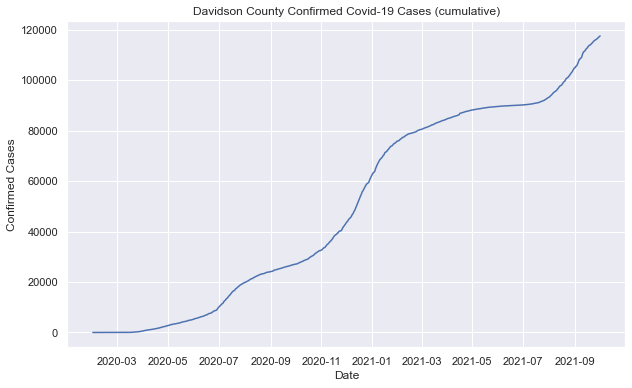

In [191]:
sns.set(rc={'figure.figsize':(10,6)})
ax = sns.lineplot(data = davidson_df, x = 'date', y = 'cases')
ax.set(title = 'Davidson County Confirmed Covid-19 Cases (cumulative)', xlabel='Date', ylabel='Confirmed Cases')
plt.show()

### This graph shows a cumulative sum of cases. We need to see how the rise of new cases was in the timeline.

Thank you for this code piece, Charles -

In [192]:
davidson_df['new_cases'] = davidson_df['cases'] - davidson_df.shift(periods=1)['cases']
davidson_df = davidson_df.fillna(0)
davidson_df.head()

,date,cases,new_cases
0,2020-02-01,0,0.0
1,2020-02-02,0,0.0
2,2020-02-03,0,0.0
3,2020-02-04,0,0.0
4,2020-02-05,0,0.0


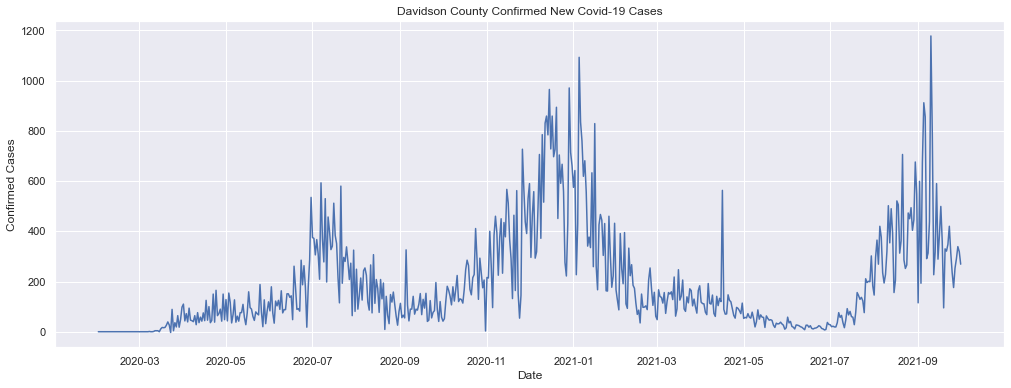

In [193]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df, x = 'date', y = 'new_cases')
ax.set(title = 'Davidson County Confirmed New Covid-19 Cases', xlabel='Date', ylabel='Confirmed Cases')
plt.show()

### We observe several peaks in the timeline: July, Dec of 2020 and Jan, April, September of 2021.

### Since there was no mask mandate data available in the given dataset for Tennessee State/Davidson County, I did some external research - 

Source: https://www.vumc.org/health-policy/news-events/tennessee-areas-without-mask-requirements-have-higher-death-toll-capita
Published Date: November 10 2020

As per this report on counties in Tennessee, the areas where mask requirements were instituted showed substantially lower death rates due to COVID-19 as compared to areas without mask requirements, according to an analysis by Vanderbilt Department of Health Policy researchers.

The analysis, led by John Graves, PhD, associate professor of Health Policy and director of the Vanderbilt Center for Health Economic Modeling, finds that early adopting counties in Tennessee saw their death rate begin to decline by late July of 2020, while later adopting counties saw declines in August and September. Non-adopting counties continue to see death rates rise, the researchers found.

Additionally, mask requirements were adopted between July 10 2020 and first week of August 2020.

We do observe a dip in new cases after July 2020. 

## Marking July 10 2020 for when masking mandate was adopted -

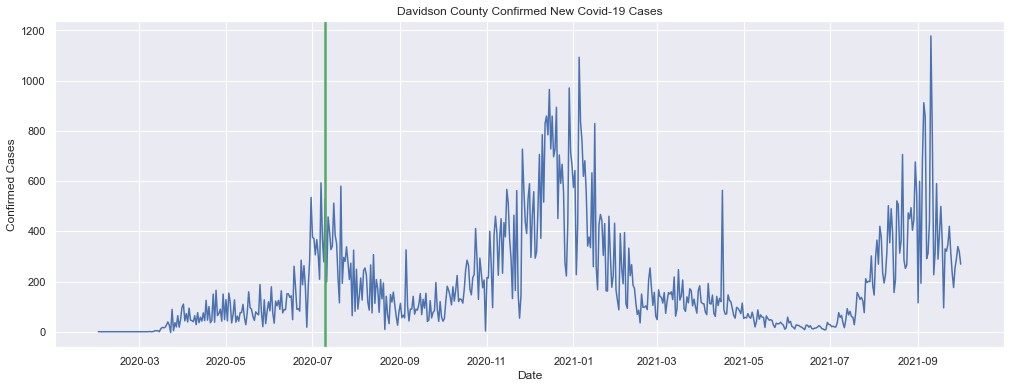

In [194]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df, x = 'date', y = 'new_cases')
ax.set(title = 'Davidson County Confirmed New Covid-19 Cases', xlabel='Date', ylabel='Confirmed Cases')
plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2.5)
plt.show()

## Aggregating daily data to weekly data to reduce fluctuations in graph view

In [208]:
#convert date column to datetime and subtract one week
davidson_df['date2'] = pd.to_datetime(davidson_df['date']) - pd.to_timedelta(7, unit='d')

#calculate sum of values, grouped by week
davidson_df_weekly = davidson_df.groupby([pd.Grouper(key='date2', freq='W')])['new_cases'].sum().reset_index()
davidson_df_weekly.head()

,date2,new_cases
0,2020-01-26,0.0
1,2020-02-02,0.0
2,2020-02-09,0.0
3,2020-02-16,0.0
4,2020-02-23,0.0


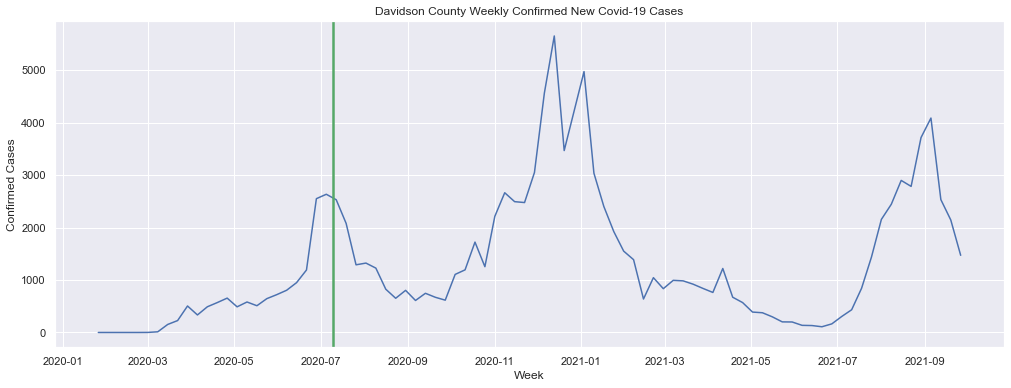

In [196]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df_weekly, x = 'date2', y = 'new_cases')
ax.set(title = 'Davidson County Weekly Confirmed New Covid-19 Cases', xlabel='Week', ylabel='Confirmed Cases')
plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2.5)
plt.show()

Additionally, as per US News, Tennessee Gov. Bill Lee signed an executive order in April 2021 that removed local authority on mask mandates.
Coincidently we observe a short rise in confirmed cases in April 2021 itself

## Marking April 2021 for when masking mandate was officially lifted -

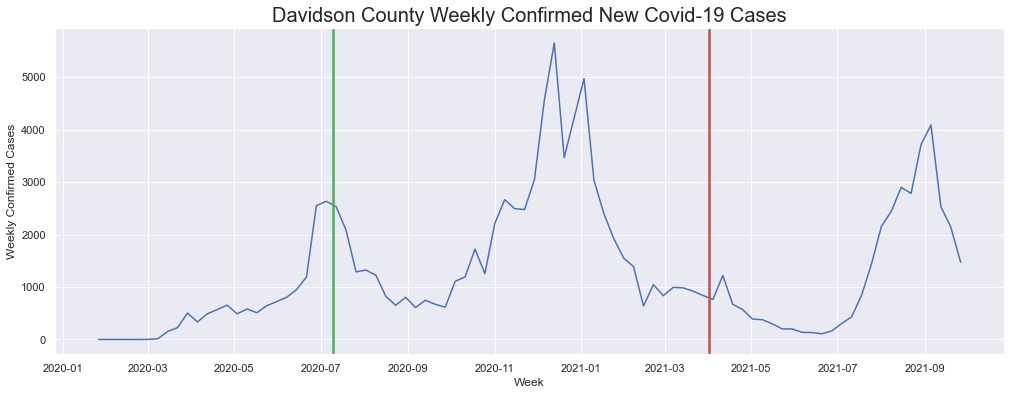

In [197]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df_weekly, x = 'date2', y = 'new_cases')
ax.set(xlabel='Week', ylabel='Weekly Confirmed Cases')
plt.title('Davidson County Weekly Confirmed New Covid-19 Cases', fontsize = 20)
plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2.5)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2.5)
plt.show()

### Even though the mask mandates show relation with rise & fall of confirmed cases, it is not enough to be concluded as a valid direct derivation.

# VISUALIZATIONS:

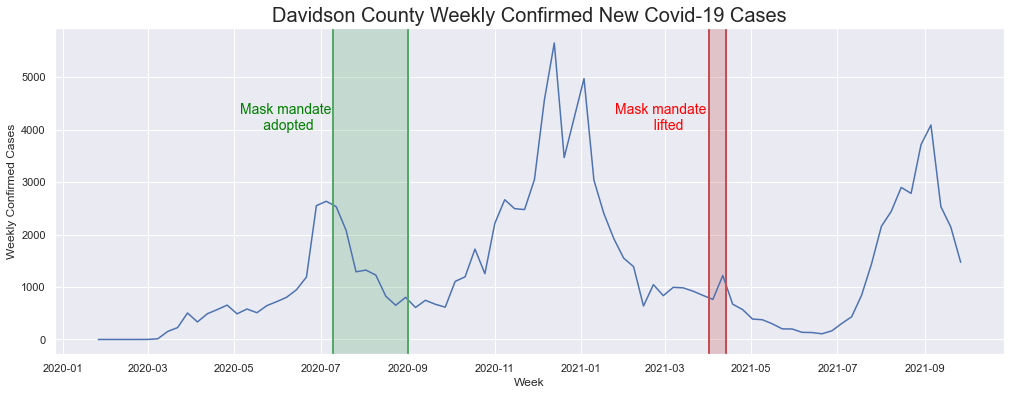

In [198]:
sns.set(rc={'figure.figsize':(17,6)})
ax = sns.lineplot(data = davidson_df_weekly, x = 'date2', y = 'new_cases')
ax.set(xlabel='Week', ylabel='Weekly Confirmed Cases')
plt.title('Davidson County Weekly Confirmed New Covid-19 Cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-13"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-13"), color='r', alpha=0.25)


plt.text(pd.to_datetime("2020-05-05"), 4000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
plt.text(pd.to_datetime("2021-01-25"), 4000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')

plt.show()

### We observed a fall in weekly cases when masks were adopted in 2020 and we observed a short rise in April 2021 when mask mandate was officially lifted. We do observe peaks and troughs through the timeline despite having no direct relation with the available mask mandate data. Therefore, we conclude that the masking policies may not always have a direct impact on the progression of Covid-19 new cases. It is also very important to consider that people did not show symptoms right away after infection. It may have taken a few days for the testing results to become available especially during the early period of the pandemic in 2020.

# Derivative function:

Using pct_change to find rate of change of the new cases over time and analysing differences in rates.

In [209]:
davidson_df_weekly['rate_of_change'] = davidson_df_weekly.new_cases.pct_change()

#replacing np.inf and initial day's rate of change to focus of the remainder of days
davidson_df_weekly.loc[davidson_df_weekly['rate_of_change']==np.inf, 'rate_of_change'] = np.nan
davidson_df_weekly.loc[davidson_df_weekly['rate_of_change']>10, 'rate_of_change'] = np.nan

Text(0.5, 1.0, 'Davidson County Rate of change in confirmed new Covid-19 cases')

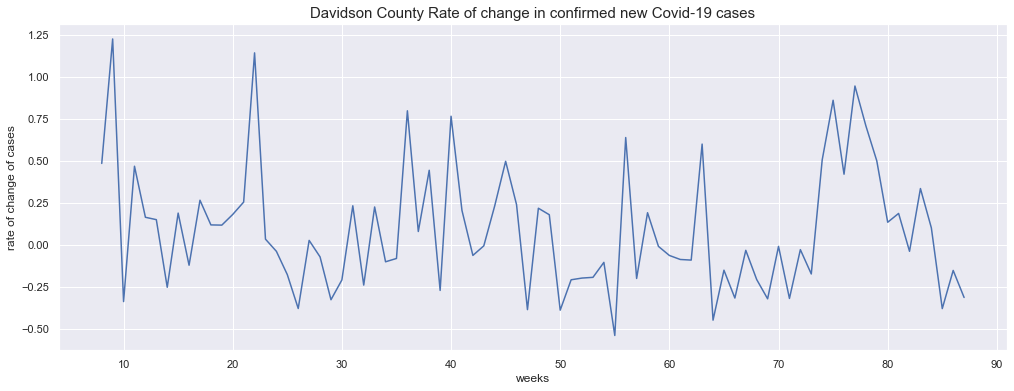

In [210]:
ax = davidson_df_weekly.rate_of_change.plot()
ax.set(xlabel='weeks', ylabel='rate of change of cases')
plt.title('Davidson County Rate of change in confirmed new Covid-19 cases', fontsize = 15)

## Analysing rate of change of infection for the 2 aforementioned timelines
Between July 2020 - Sept 2020 and the month of April in 2021.

In [211]:
davidson_df_weekly['rate_of_change2'] = davidson_df_weekly['rate_of_change'].copy()

davidson_df_weekly['indicator'] = 0
davidson_df_weekly.loc[(davidson_df_weekly['date2']>=pd.to_datetime("2020-07-10")) & \
                       (davidson_df_weekly['date2']<=pd.to_datetime("2020-09-01")), 'indicator'] = 1
davidson_df_weekly.loc[(davidson_df_weekly['date2']>=pd.to_datetime("2021-04-01")) & \
                       (davidson_df_weekly['date2']<=pd.to_datetime("2021-04-13")), 'indicator'] = 1

In [212]:
davidson_df_weekly.loc[davidson_df_weekly['indicator']!=1, 'rate_of_change2'] = np.nan

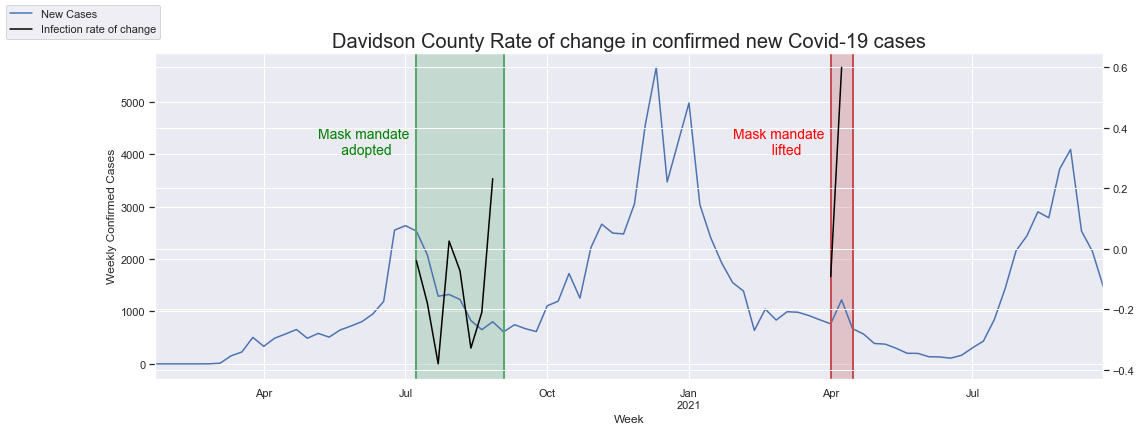

In [214]:
davidson_df_weekly.rename(columns = {'rate_of_change2':'Percentage rate of change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(17,6)})
ax = davidson_df_weekly.plot(x="date2", y="New Cases", legend=False)
ax.set(xlabel='Week', ylabel='Weekly Confirmed Cases')
plt.title('Davidson County: Rate of change in confirmed new Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-13"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-13"), color='r', alpha=0.25)

plt.text(pd.to_datetime("2020-05-05"), 4000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
plt.text(pd.to_datetime("2021-01-25"), 4000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')


ax2 = ax.twinx()
davidson_df_weekly.plot(x="date2", y="Percentage rate of change of confirmed cases", ax=ax2, legend=False, color="black")

ax.figure.legend(loc = 'upper left')
plt.show()

The rate of change is observed as a zoomed in view using a dual axes plot.
We observe a variability in rate of change of cases in the green phase. Where as we observe a steep rise in rate of change of cases in the red phase.

# Similar analysis on daily confirmed cases - 

In [205]:
davidson_df.head(2)

,date,cases,new_cases,date2
0,2020-02-01,0,0.0,2020-01-25
1,2020-02-02,0,0.0,2020-01-26


In [261]:
davidson_df2 = davidson_df.copy()

davidson_df2['rate_of_change'] = davidson_df2.new_cases.pct_change()

#replacing np.inf and initial day's rate of change to focus of the remainder of days
davidson_df2.loc[davidson_df2['rate_of_change']==np.inf, 'rate_of_change'] = np.nan
#davidson_df2.loc[davidson_df2['rate_of_change']>10, 'rate_of_change'] = np.nan #ignore

davidson_df2['rate_of_change2'] = davidson_df2['rate_of_change'].copy()

#ignore -
# davidson_df2['indicator'] = 0
# davidson_df2.loc[(davidson_df2['date2']>=pd.to_datetime("2020-07-10")) & \
#                        (davidson_df2['date2']<=pd.to_datetime("2020-09-01")), 'indicator'] = 1
# davidson_df2.loc[(davidson_df2['date2']>=pd.to_datetime("2021-04-01")) & \
#                        (davidson_df2['date2']<=pd.to_datetime("2021-04-13")), 'indicator'] = 1

# davidson_df2.loc[davidson_df2['indicator']!=1, 'rate_of_change2'] = np.nan

In [278]:
davidson_df3 = davidson_df2[davidson_df2['date']>=pd.to_datetime("2020-03-06")].reset_index(drop=True)
davidson_df3.head()

,date,cases,new_cases,date2,rate_of_change,rate_of_change2
6,2020-03-12,6,4.0,2020-03-05,3.000000,3.000000
7,2020-03-13,10,4.0,2020-03-06,0.000000,0.000000
8,2020-03-14,14,4.0,2020-03-07,0.000000,0.000000
11,2020-03-17,42,17.0,2020-03-10,0.545455,0.545455
12,2020-03-18,58,16.0,2020-03-11,-0.058824,-0.058824


# FINAL VISUALIZATION

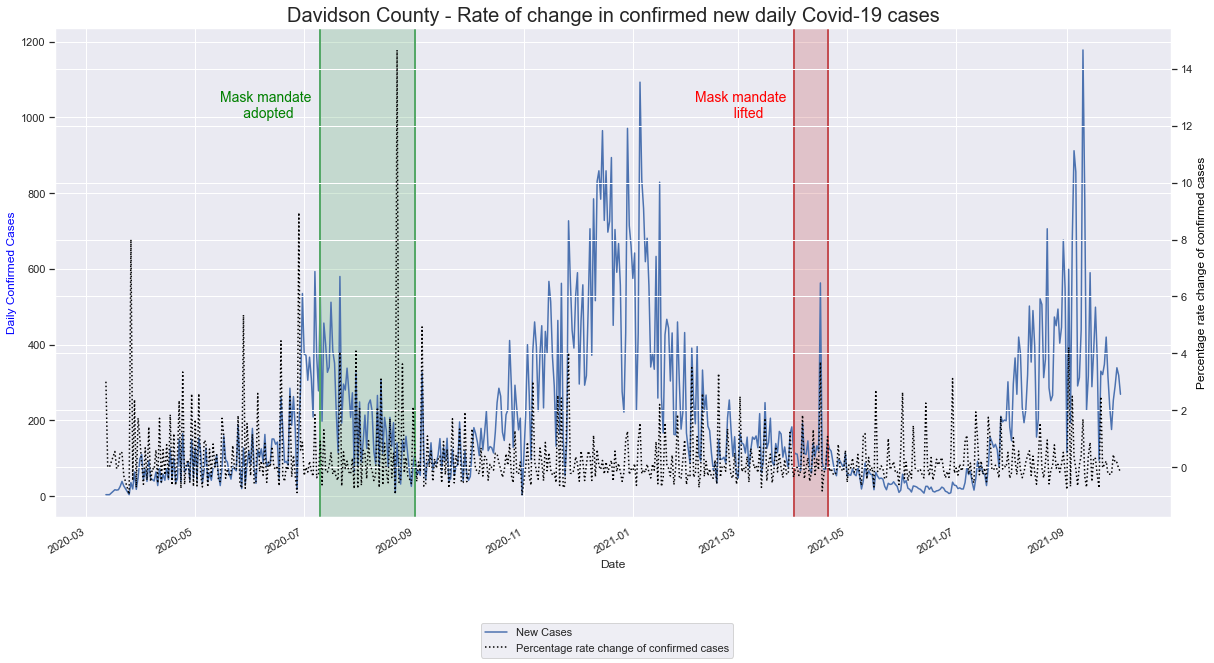

In [285]:
davidson_df3.rename(columns = {'rate_of_change2':'Percentage rate change of confirmed cases', 'new_cases':'New Cases'}, inplace = True)

sns.set(rc={'figure.figsize':(20,10)})
ax = davidson_df3.plot(x="date", y="New Cases", legend=False)
ax.set(xlabel='Date', ylabel='Daily Confirmed Cases')
ax.yaxis.label.set_color('blue')
plt.title('Davidson County - Rate of change in confirmed new daily Covid-19 cases', fontsize = 20)

plt.axvline(x = pd.to_datetime("2020-07-10"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2020-09-01"), color = 'g', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-01"), color = 'r', linewidth = 2)
plt.axvline(x = pd.to_datetime("2021-04-20"), color = 'r', linewidth = 2)

plt.axvspan(xmin = pd.to_datetime("2020-07-10"), xmax = pd.to_datetime("2020-09-01"), color='g', alpha=0.25)
plt.axvspan(xmin = pd.to_datetime("2021-04-01"), xmax = pd.to_datetime("2021-04-20"), color='r', alpha=0.25)

plt.text(pd.to_datetime("2020-05-15"), 1000,'Mask mandate\n      adopted', fontsize = 14, color = 'green')
plt.text(pd.to_datetime("2021-02-05"), 1000,'Mask mandate\n          lifted', fontsize = 14, color = 'red')


ax2 = ax.twinx()
davidson_df3.plot(x="date", y="Percentage rate change of confirmed cases", ax=ax2, legend=False, color="black", linestyle='dotted')
ax2.set(ylabel='Percentage rate change of confirmed cases')
ax2.yaxis.label.set_color('black')

ax.figure.legend(loc = 'lower center')
plt.show()

Summary

The rate of change in confirmed daily cases is the black dotted line.

Since this is daily data, we observe a lot of variability throughout. However, if you observe the green phase where mask mandate was adopted, you will notice that the rate of change of cases is lower than prior rates until there is a sharp increase of about 14% in new cases. This could perhaps be because of the complacency of people wearing masks while observing the rate of Covid-19 cases going down (established earlier) and then choosing to remove masks owing to the decreased rate of change.

When the Governor officially lifted the Mask mandate in 2021 (Red phase), we again observe a sudden sharp increase in new cases. We can associate this steep rise due to relatively less or no usage of masks.

As mentioned above, we do observe peaks and troughs in both blue and black lines despite having no direct relation with the available mask mandate data. Therefore, we conclude that the masking policies may not always have a direct impact on the progression of Covid-19 new cases. It is also very important to consider that people did not show symptoms right away after infection. It may have taken a few days for the testing results to become available especially during the early period of the pandemic in 2020.